### Import Necessary Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

### Generate Dataset and Add Noise

shape of the x: (300, 2)
shape of the y: (300,)


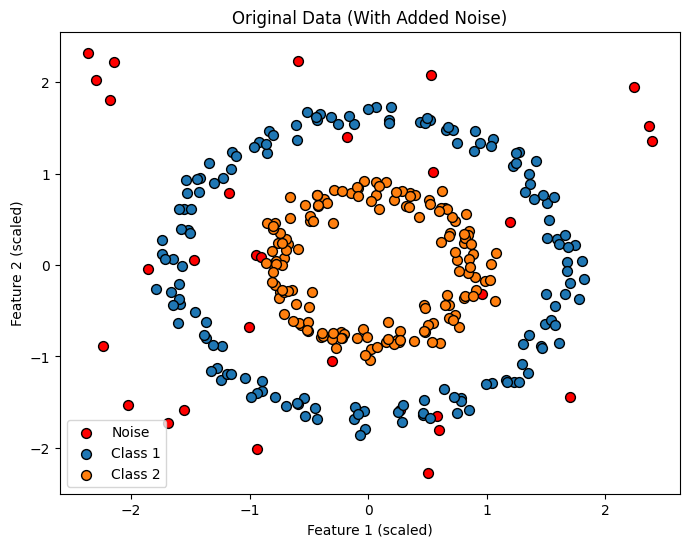

In [ ]:
# Generate circular dataset
X, y_true = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
print(f"shape of the x: {X.shape}")
print(f"shape of the y: {y_true.shape}")

# Generate random noise (outliers)
np.random.seed(42)
noise_points = np.random.uniform(low=-1.5, high=1.5, size=(30, 2))  

# Combine dataset with noise points
X = np.vstack([X, noise_points])
y_true = np.hstack([y_true, [-1] * len(noise_points)])  

# Step 4: Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


plt.figure(figsize=(8, 6))
for label in np.unique(y_true):
    mask = (y_true == label)
    if label == -1:
        plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], c='red', s=50, edgecolor='k', label="Noise")
    else:
        plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], s=50, edgecolor='k', label=f"Class {label+1}")
        
plt.title("Original Data (With Added Noise)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()

### DBScan

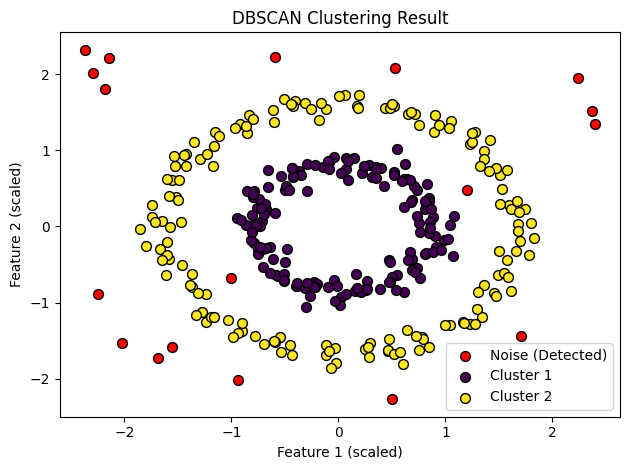

Number of clusters detected: 2
Number of noise points detected: 18


In [21]:
# Apply DBSCAN 
# eps = circle radius
dbscan = DBSCAN(eps=0.3, min_samples=5) 
dbscan_labels = dbscan.fit_predict(X_scaled)

# DBSCAN Clustering Result 
unique_labels = np.unique(dbscan_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels[unique_labels != -1])))

color_idx = 0
for label in unique_labels:
    mask = (dbscan_labels == label)
    if label == -1:
        plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], c='red', s=50, edgecolor='k', label="Noise (Detected)")
    else:
        plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], color=colors[color_idx], s=50, edgecolor='k', label=f"Cluster {label+1}")
        color_idx += 1

plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()

plt.tight_layout()
plt.show()


# Count clusters (excluding noise label -1)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
# Count noise points
n_noise = list(dbscan_labels).count(-1)
print(f"Number of clusters detected: {n_clusters}")
print(f"Number of noise points detected: {n_noise}")



### CorePoint, BorderPoint and NoisePoint Visualizaiton 

C:\Users\Israil\AppData\Local\Temp\ipykernel_15052\1188402703.py:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_scaled[mask_border, 0], X_scaled[mask_border, 1], c=[color], s=50, edgecolor='k', marker='x', label=f'Cluster {label+1} - Border point')


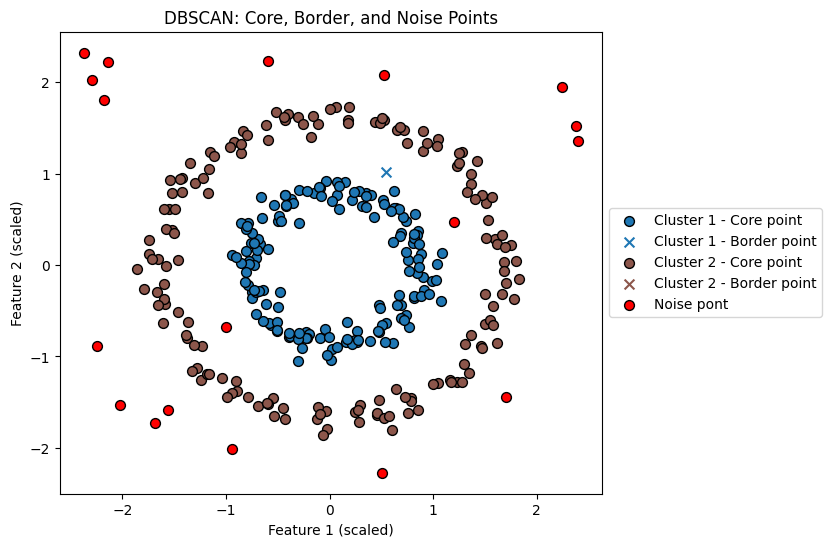

In [29]:
# Identify core, border, and noise points
core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(7, 6))
unique_labels = set(dbscan_labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points
        mask = (dbscan_labels == -1)
        plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], c='red', s=50, edgecolor='k', label='Noise pont')
    else:
        # Core points in cluster
        mask_core = (dbscan_labels == label) & core_samples_mask
        plt.scatter(X_scaled[mask_core, 0], X_scaled[mask_core, 1], c=[color], s=50, edgecolor='k', marker='o', label=f'Cluster {label+1} - Core point')

        # Border points in cluster
        mask_border = (dbscan_labels == label) & ~core_samples_mask
        plt.scatter(X_scaled[mask_border, 0], X_scaled[mask_border, 1], c=[color], s=50, edgecolor='k', marker='x', label=f'Cluster {label+1} - Border point')

plt.title("DBSCAN: Core, Border, and Noise Points")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Comparison K-means,Hierarchical and DBScan Clustering Algorithm 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN
import matplotlib.patches as mpatches

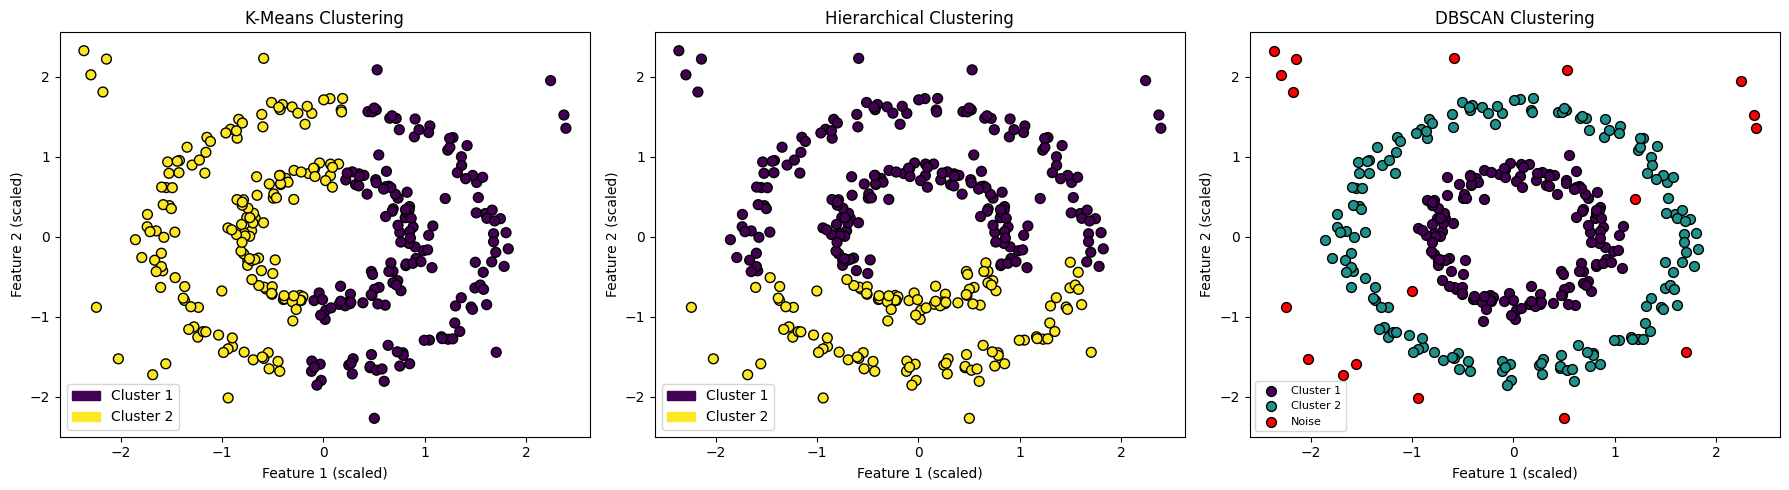

In [37]:
# K-Means clustering (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hierarchical clustering (Agglomerative, k=2)
hierarchical = AgglomerativeClustering(n_clusters=2)
hier_labels = hierarchical.fit_predict(X_scaled)

# Plot results 
plt.figure(figsize=(18, 5))

# K-Means 
plt.subplot(1, 3, 1)
scatter_kmeans = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")

# Create legend for K-Means 
colors_kmeans = [scatter_kmeans.cmap(scatter_kmeans.norm(i)) for i in range(2)]
patches_kmeans = [mpatches.Patch(color=colors_kmeans[i], label=f'Cluster {i+1}') for i in range(2)]
plt.legend(handles=patches_kmeans, loc='best')

# Hierarchical 
plt.subplot(1, 3, 2)
scatter_hier = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hier_labels, cmap='viridis', edgecolor='k', s=50)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")

# Create legend for Hierarchical
colors_hier = [scatter_hier.cmap(scatter_hier.norm(i)) for i in range(2)]
patches_hier = [mpatches.Patch(color=colors_hier[i], label=f'Cluster {i+1}') for i in range(2)]
plt.legend(handles=patches_hier, loc='best')

# DBSCAN 
plt.subplot(1, 3, 3)
unique_labels = set(dbscan_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        mask = (dbscan_labels == -1)
        plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], c='red', s=50, edgecolor='k', label='Noise')
    else:
        mask = (dbscan_labels == label)
        plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], color=color, s=50, edgecolor='k', label=f'Cluster {label+1}')
        
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(loc='best', fontsize=8)

plt.tight_layout()
plt.show()